## Web Scraping

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import datetime

In [36]:
content = requests.get(
    "http://web.mta.info/developers/turnstile.html").content.decode("utf-8")
# Convert the main page contents to soup
soup = BeautifulSoup(content, 'lxml')

In [37]:
# WEB SCRAPER
content = requests.get(
    "http://web.mta.info/developers/turnstile.html").content.decode("utf-8")
# Convert the main page contents to soup
soup = BeautifulSoup(content, 'lxml')

LOCATION = 'C:/Users/Harpreet Gaur/Desktop/Turnstile_Analysis' # ex: '/home/tom/Documents/turnstile/Data/'

a_tags = soup.select('div.span-84.last > a')


In [38]:
date_list = []
files_names = []

# looping through all the <a> tag elements
for a_tag in a_tags:
  # Convert the inner text of the a tag to a datetime object
  d = datetime.datetime.strptime(a_tag.text.strip(), "%A, %B %d, %Y")
  # put the formatted date in the array if it is in the year of 2013
  if d.year == 2013:
      date_list.append(d.strftime("%y%m%d")) # append + format the datetime object to string
      

In [39]:
# loop the date list
for dl in date_list:
  # get the file link from the date
  url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(dl)
    
  # Getting the file's content
  print("Processing URL: " + url)
  content = requests.get(url).content.decode("utf-8")

  # Save the content in to a csv file
  print("Converting to CSV...")

  # Save to file in the data folder
  f = open("./turnstile_{}.csv".format(dl), "w")

  # Replace the \r escape character that's adding an extra line between each record
  f.write(content.replace("\r", ""))

  f.close()
  print("Finished " + dl + "!\n")

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131228.txt
Converting to CSV...
Finished 131228!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131221.txt
Converting to CSV...
Finished 131221!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131214.txt
Converting to CSV...
Finished 131214!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131207.txt
Converting to CSV...
Finished 131207!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131130.txt
Converting to CSV...
Finished 131130!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131123.txt
Converting to CSV...
Finished 131123!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131116.txt
Converting to CSV...
Finished 131116!

Processing URL: http://web.mta.info/developers/data/nyct/turnstile/turnstile_131109.txt
Converting to CSV...
Fi

In [40]:
#All 
files_names = ['turnstile_130105.csv', 'turnstile_130112.csv', 'turnstile_130119.csv' , 'turnstile_130126.csv' ,
'turnstile_130202.csv' , 'turnstile_130209.csv' ,'turnstile_130216.csv' ,'turnstile_130223.csv' ,'turnstile_130302.csv' ,
'turnstile_130309.csv' ,'turnstile_130316.csv' ,'turnstile_130323.csv' ,'turnstile_130330.csv' ,'turnstile_130406.csv' ,
'turnstile_130413.csv' ,'turnstile_130420.csv' ,'turnstile_130427.csv' ,'turnstile_130504.csv' ,'turnstile_130511.csv' ,
'turnstile_130518.csv' ,'turnstile_130525.csv' ,'turnstile_130601.csv' ,'turnstile_130608.csv' ,'turnstile_130615.csv' ,
'turnstile_130622.csv' ,'turnstile_130629.csv' ,'turnstile_130706.csv' ,'turnstile_130713.csv' ,'turnstile_130720.csv' ,
'turnstile_130727.csv' ,'turnstile_130803.csv' ,'turnstile_130810.csv' ,'turnstile_130817.csv' ,'turnstile_130824.csv' ,
'turnstile_130831.csv' ,'turnstile_130907.csv' ,'turnstile_130914.csv' ,'turnstile_130921.csv' ,'turnstile_130928.csv' ,
'turnstile_131005.csv' ,'turnstile_131012.csv' ,'turnstile_131019.csv' ,'turnstile_131026.csv' ,
'turnstile_131102.csv' ,'turnstile_131109.csv' ,'turnstile_131116.csv' ,'turnstile_131123.csv' ,
'turnstile_131130.csv' ,'turnstile_131207.csv' ,'turnstile_131214.csv' ,'turnstile_131221.csv' ,
'turnstile_131228.csv' 
]

columns = ['C/A','UNIT','SCP','DATE1','TIME1','DESC1','ENTRIES1','EXITS1','DATE2','TIME2','DESC2','ENTRIES2','EXITS2','DATE3','TIME3','DESC3','ENTRIES3','EXITS3','DATE4','TIME4','DESC4','ENTRIES4','EXITS4','DATE5','TIME5','DESC5','ENTRIES5','EXITS5','DATE6','TIME6','DESC6','ENTRIES6','EXITS6','DATE7','TIME7','DESC7','ENTRIES7','EXITS7','DATE8','TIME8','DESC8','ENTRIES8','EXITS8']


## Further Data-Cleaning

In [41]:
station_loc = LOCATION+'/Remote-Booth-Station.csv' # location of the Remote-Booth-Station.csv file in local machine
              
station_csv = pd.read_csv(station_loc)

LOCATION = 'C:/Users/Harpreet Gaur/Desktop/Turnstile_Analysis/'

In [42]:
def assign_station(df, station_csv):
    station=[]
    station_csv = station_csv.dropna()
    for i in range(len(df)):
        unit = df.UNIT.values[i]
        ca = df['C/A'].values[i]
        a = station_csv[(station_csv['Remote']==unit) & (station_csv['Booth']==ca)]
        if not a.empty:
            station.append(a.Station.values[0])
        else:
            station.append(np.NaN)
    df['Station'] = station
    return df



In [43]:
def remove_recovr_aud():
    for i in range(len(files_names)):
        data = pd.read_csv(LOCATION + files_names[i], names=columns)
        data_fnames = assign_station(data, station_csv)
        data_fname_new = data_fnames[(data_fnames['DESC1'] != 'RECOVR AUD') & (data_fnames['DESC2'] != 'RECOVR AUD') & (data_fnames['DESC3'] != 'RECOVR AUD')
        & (data_fnames['DESC4'] != 'RECOVR AUD') & (data_fnames['DESC5'] != 'RECOVR AUD') & (data_fnames['DESC6'] != 'RECOVR AUD') & (data_fnames['DESC7'] != 'RECOVR AUD')
        & (data_fnames['DESC8'] != 'RECOVR AUD')]
        data_fname_new.to_csv(LOCATION + files_names[i])


remove_recovr_aud()

## Which station has the most number of units?


In [45]:
def station_list():
    asd_ = pd.concat([pd.read_csv(LOCATION + files_names[i]) for i in range(len(files_names))], ignore_index=True)
    asd = asd_.drop(columns='Unnamed: 0')
    
    sum_ = asd.groupby(['Station']).UNIT.unique()
    stations = list(sum_.keys())
    unique = []
    for i in range(len(sum_)):
        unique.append(len(sum_[i]))
        
    return stations[unique.index(max(unique))]
    
print('The station that has the most number of units is: ' + str(station_list()))

The station that has the most number of units is: 86 ST


## What is the total number of entries & exits across the subway system for February 1, 2013?

In [47]:
feb = pd.read_csv(LOCATION + 'turnstile_130202.csv')


In [63]:

def exits(df, day):
    exits_ = []
    station_ = []
    stations = list(df['Station'].unique())
    hours = ['0'+str(i)+':00:00' for i in range(0, 4)]
    offset = []
    for j in range(len(stations)): 
        df_temp = df[df['Station'] == stations[j]]
        exits_stat = []
        for i in range(2, len(df_temp)-1):
            k = np.nan
            for k_0 in range(1,9):
                for m in range(len(hours)): # This loop is because not every 1 of Feb starts at the same hours. They start between 00:00:00 and 04:00:00, so we have to loop for this values to get the right one of the row.
                    if df_temp['DATE%s' % k_0].values[i] == day and df_temp['TIME%s' % k_0].values[i] == hours[m]:
                        k = k_0
                        break
            
            if not np.isnan(k):
                if k>1:
                        # Here we start in the first hour of Feb 1, and sum the next values until we get to another date.
                    kf = range(k+1, 9)
                    ki = range(1, k+1)
                    lst = [df['EXITS%s' % l][i] for l in kf if df['EXITS%s' % l][i]!=0] + [df['EXITS%s' % l][i+1] for l in ki if df['EXITS%s' % l][i+1]!=0 or df['EXITS%s' % l][i]!=np.nan]
                    exits_stat.append(sum(lst) - len(lst)*df['EXITS%s' % (k-1)][i]) # The '- len(lst)*df['EXITS%s' % (k-1)][i]' is to substract the cumulative part.
                    offset.append(df['EXITS%s' % (k-1)][i])
                    break
                    
               
                elif k == 1:
                    lst = [df['EXITS%s' % l][i] for l in range(1, 9) if df['EXITS%s' % l][i]!=0 or df['EXITS%s' % l][i]!=np.nan] 
                    exits_stat.append(sum(lst) - len(lst)*df['EXITS8'][i-1])
                    offset.append(df['EXITS8'][i])
                    
                    break
        exits_.append(sum(exits_stat))
        station_.append(stations[j])
    exits = []
    station = []
    for i in range(len(exits_)):
        if abs(exits_[i]) < 10000000:
            exits.append(exits_[i])
            station.append(station_[i])
    return exits, offset, station


In [50]:
# The 'entries' function is the same as the 'exit' but changing EXITS%s --> ENTRIES%s
def entries(df, day):
    entries_ = []
    station_ = []
    stations = list(df['Station'].unique())
    hours = ['0'+str(i)+':00:00' for i in range(0, 4)]
    offset = []
    for j in range(len(stations)):
        df_temp = df[df['Station'] == stations[j]]
        entries_stat = []
        indxs = list(df_temp.index)
        for i in range(len(indxs)-1):
            k = np.nan
            for k_0 in range(1,9):
                for m in range(len(hours)):
                    if df_temp.loc[indxs[i], 'DATE%s' % k_0] == day and df_temp.loc[indxs[i], 'TIME%s' % k_0] == hours[m]:
                        k = k_0
                        break
            
            if not np.isnan(k):
                if k>1:
                        
                    kf = range(k+1, 9)
                    ki = range(1, k+1)
                    lst = [df_temp.loc[indxs[i], 'ENTRIES%s' % l] for l in kf if df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=0] + [df_temp.loc[indxs[i+1], 'ENTRIES%s' % l] for l in ki if df_temp.loc[indxs[i+1], 'ENTRIES%s' % l]!=0 or df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=np.nan]
                    entries_stat.append(sum(lst) - len(lst)*df_temp.loc[indxs[i], 'ENTRIES%s' % (k-1)])
                    offset.append(df_temp.loc[indxs[i], 'ENTRIES%s' % (k-1)])
                    break
                    
               
                elif k == 1:
                    lst = [df_temp.loc[indxs[i], 'ENTRIES%s' % l] for l in range(1, 9) if df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=0 or df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=np.nan] 
                    entries_stat.append(sum(lst) - len(lst)*df_temp.loc[indxs[i-1], 'ENTRIES8'])
                    offset.append(df_temp.loc[indxs[i], 'ENTRIES8'])
                    
                    break
        entries_.append(sum(entries_stat))
        station_.append(stations[j])
    entries = []
    station = []
    for i in range(len(entries_)):
        if abs(entries_[i]) < 10000000:
            entries.append(entries_[i])
            station.append(station_[i])
    return entries, offset, station
    
entries_01, entries_31, stations_ent = entries(feb, '02-01-13')
exits_01, exits_31, stations_ex = exits(feb, '02-01-13')

print('Total number of entries for Febraury 1: ' + str(sum(entries_01)))
print('Total number of exits for Febraury 1: ' + str(sum(exits_01)))

Total number of entries for Febraury 1: 7281223.0
Total number of exits for Febraury 1: 323351.0


## Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on February 1, 2013? What turnstile was the busiest on that date?

In [51]:
business = [entries_01[i] + exits_01[i] for i in range(len(entries_01))]
ind = business.index(max(business))  
print('The bussiest station on 1 Feb was: ' + str(stations_ent[ind]))

The bussiest station on 1 Feb was: AVE U


In [54]:
feb = pd.read_csv(LOCATION + 'turnstile_130202.csv')


def exits(df, day):
    exits_ = []
    station_ = []
    stations = list(df['SCP'].unique())
    hours = ['0'+str(i)+':00:00' for i in range(0, 4)]
    offset = []
    for j in range(len(stations)):
        df_temp = df[df['SCP'] == stations[j]]
        exits_stat = []
        for i in range(2, len(df_temp)-1):
            k = np.nan
            for k_0 in range(1,9):
                for m in range(len(hours)):
                    if df_temp['DATE%s' % k_0].values[i] == day and df_temp['TIME%s' % k_0].values[i] == hours[m]:
                        k = k_0
                        break
            
            if not np.isnan(k):
                if k>1:
                        
                    kf = range(k+1, 9)
                    ki = range(1, k+1)
                    lst = [df['EXITS%s' % l][i] for l in kf if df['EXITS%s' % l][i]!=0] + [df['EXITS%s' % l][i+1] for l in ki if df['EXITS%s' % l][i+1]!=0 or df['EXITS%s' % l][i]!=np.nan]
                    exits_stat.append(sum(lst) - len(lst)*df['EXITS%s' % (k-1)][i])
                    offset.append(df['EXITS%s' % (k-1)][i])
                    break
                    
               
                elif k == 1:
                    lst = [df['EXITS%s' % l][i] for l in range(1, 9) if df['EXITS%s' % l][i]!=0 or df['EXITS%s' % l][i]!=np.nan] 
                    exits_stat.append(sum(lst) - len(lst)*df['EXITS8'][i-1])
                    offset.append(df['EXITS8'][i])
                    
                    break
        exits_.append(sum(exits_stat))
        station_.append(stations[j])
    exits = []
    station = []
    for i in range(len(exits_)):
        if abs(exits_[i]) < 10000000:
            exits.append(exits_[i])
            station.append(station_[i])
    return exits, offset, station



In [55]:
def entries(df, day):
    entries_ = []
    station_ = []
    stations = list(df['SCP'].unique())
    hours = ['0'+str(i)+':00:00' for i in range(0, 4)]
    offset = []
    for j in range(len(stations)):
        df_temp = df[df['SCP'] == stations[j]]
        entries_stat = []
        indxs = list(df_temp.index)
        for i in range(len(indxs)-1):
            k = np.nan
            for k_0 in range(1,9):
                for m in range(len(hours)):
                    if df_temp.loc[indxs[i], 'DATE%s' % k_0] == day and df_temp.loc[indxs[i], 'TIME%s' % k_0] == hours[m]:
                        k = k_0
                        break
            
            if not np.isnan(k):
                if k>1:
                        
                    kf = range(k+1, 9)
                    ki = range(1, k+1)
                    lst = [df_temp.loc[indxs[i], 'ENTRIES%s' % l] for l in kf if df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=0] + [df_temp.loc[indxs[i+1], 'ENTRIES%s' % l] for l in ki if df_temp.loc[indxs[i+1], 'ENTRIES%s' % l]!=0 or df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=np.nan]
                    entries_stat.append(sum(lst) - len(lst)*df_temp.loc[indxs[i], 'ENTRIES%s' % (k-1)])
                    offset.append(df_temp.loc[indxs[i], 'ENTRIES%s' % (k-1)])
                    break
                    
               
                elif k == 1:
                    lst = [df_temp.loc[indxs[i], 'ENTRIES%s' % l] for l in range(1, 9) if df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=0 or df_temp.loc[indxs[i], 'ENTRIES%s' % l]!=np.nan] 
                    entries_stat.append(sum(lst) - len(lst)*df_temp.loc[indxs[i-1], 'ENTRIES8'])
                    offset.append(df_temp.loc[indxs[i], 'ENTRIES8'])
                    
                    break
        entries_.append(sum(entries_stat))
        station_.append(stations[j])
    entries = []
    station = []
    for i in range(len(entries_)):
        if abs(entries_[i]) < 10000000:
            entries.append(entries_[i])
            station.append(station_[i])
    return entries, offset, station

In [56]:
entries_01, entries_31, stations_ent = entries(feb, '02-01-13')
exits_01, exits_31, stations_ex = exits(feb, '02-01-13')

business = [entries_01[i] + exits_01[i] for i in range(len(entries_01))]

ind = business.index(max(business))

print('The bussiest turnstile on 1 Feb was: ' + str(stations_ent[ind]))

The bussiest turnstile on 1 Feb was: 03-00-03


### Usefull functions to be used later on

In [59]:
def total_entries(data):
    df = data.copy() 
    indexs = list(df.index)
    for i in range(len(indexs)):
        for k in range(1,9): # Iterate over the columns
            if not np.isnan(df.loc[indexs[i], 'ENTRIES%s' % (k)]): # If the corresponding cell is not empty:
                if k>1: # If it's not the first cell:
                    point = df.at[indexs[i], 'ENTRIES%s' % (k)] - df.at[indexs[i], 'ENTRIES%s' % (k-1)] # substract the cumulative part
                    if point > 0 and point < 100000: #If the substracion is nos an outlier:
                        df.at[indexs[i], 'ENTRIES%s' % (k)] = point  # Replace the cell by the value without the cumulative part
                    else:  # If it was an outlier, replace it by 0
                        df.at[indexs[i], 'ENTRIES%s' % (k)]  = 0
                elif k == 1 and indexs[i] == indexs[i-1]+1: 
                    try:
                        point = df.at[indexs[i], 'ENTRIES1'] - df.at[indexs[i-1], 'ENTRIES8']
                        if point < 100000 and point > 0 :
                            df.at[indexs[i], 'ENTRIES1'] = point
                        else:
                            df.at[indexs[i], 'ENTRIES1'] = 0
                    except KeyError:
                        continue
    return df


# The same as the funtion before, but with the exits
def total_exits(data):
    df = data.copy()
    indexs = list(df.index)
    for i in range(len(indexs)):
        for k in range(1,9):
            if not np.isnan(df.loc[indexs[i], 'ENTRIES%s' % (k)]):
                if k>1:
                    point = df.at[indexs[i], 'EXITS%s' % (k)] - df.at[indexs[i], 'EXITS%s' % (k-1)]
                    if point > 0 and point < 100000: 
                        df.at[indexs[i], 'EXITS%s' % (k)] = point
                    else:
                        df.at[indexs[i], 'EXITS%s' % (k)]  = 0
                elif k == 1 and indexs[i] == indexs[i-1]+1  :
                    try:
                        point = df.at[indexs[i], 'EXITS1'] - df.at[indexs[i-1], 'EXITS8']
                        if point < 100000 and point > 0 :
                            df.at[indexs[i], 'EXITS1'] = point
                        else:
                            df.at[indexs[i], 'EXITS1'] = 0
                    except KeyError:
                        continue

    return df

def filter_(df):   # This is a filter for the outliers. My criterion was that if a value (tipically of entries or exits) was bigger than 1000000, then I would replace it by the next value.
    for i in range(len(df)):
        if abs(df[i]) > 1000000:
            df[i] = df[i+1]
    return df

## What stations have seen the most usage growth/decline in 2013?
We define the growth (decline) of usage in a station as the ratio between the mean of the 3 first (last) weeks with the 3 last (first).

If the growth is >5, then that station is included in the most growth usage.

If the decline is <1, then that station is included in the most decline usage.

In [60]:
def usage_station():
    data_ = pd.concat([pd.read_csv(LOCATION + files_names[i] ) for i in range(len(files_names))], ignore_index=True)
    data_ = data_.drop(columns='Unnamed: 0')
    stations = list(data_['Station'].unique())
    business = []

    for j in range(len(stations)):
        data = data_[data_.Station == stations[j]]
        data = total_entries(data)
        data = total_exits(data)
        
        suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
        suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()
        
        business.append([suma_ent[i] + suma_ex[i] for i in range(len(suma_ent))])

    return business, stations


business, stations = usage_station()
growth = []
decline = []
for i in range(len(business)):
    if len(business[i]) > 7:
        initial = np.mean(business[i][0:3])
        final = np.mean(business[i][-4:-1])
        if initial/final > 5 and final != 0:
            growth.append(stations[i])
        elif final/initial > 2 and initial != 0:
            decline.append(stations[i])
        
print('/////')
print('The stations that have seen the most usage growth in 2013 are: ' + str(growth))
print('/////')
print('The stations that have seen the most usage decline in 2013 are: ' + str(decline))
print('/////')

/////
The stations that have seen the most usage growth in 2013 are: ['BROAD ST', 'BOTANIC GARDEN', 'NEWKIRK AVE', '36 ST', '8 AVE', 'NEW UTRECHT AVE', '20 AVE', 'STILLWELL AVE', 'ROCKAWAY PKY', 'FRESH POND ROAD', 'W 4 ST-WASH SQ', 'UTICA AVE', 'KINGSBRIDGE RD', '7 AVE-53 ST', 'QUEENS PLAZA', 'NORTHERN BLVD', 'MYRTLE-WILLOUGH', '2 AVE', 'HOUSTON ST', 'E TREMONT AVE', 'E 177 ST-PARKCH', '5 AVE-53 ST', 'ROCKAWAY PK 116']
/////
The stations that have seen the most usage decline in 2013 are: ['LEXINGTON AVE', '5 AVE-59 ST', '49 ST-7 AVE', '42 ST-TIMES SQ', '34 ST-HERALD SQ', '23 ST-5 AVE', '14 ST-UNION SQ', "PRINCE ST-B'WAY", 'CANAL ST', "MURRAY ST-B'WAY", 'CORTLANDT ST', 'RECTOR ST', 'CHAMBERS ST', '7 AVE', 'PROSPECT PARK', 'CHURCH AVE', 'AVE J', 'AVE U', 'OCEAN PARKWAY', 'BOROUGH HALL/CT', 'JAY ST-METROTEC', 'DEKALB AVE', 'PACIFIC ST', '9 ST', '25 ST', '59 ST', '86 ST', 'BAY RIDGE-95 ST', '18 AVE', 'BAY PKY-22 AVE', '50 ST', 'BAY PARKWAY', 'W 8 ST-AQUARIUM', '6 AVE', 'LORIMER ST', 'GRAND

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


## What dates are the least busy? Could you identify days on which stations were not operating at full capacity or closed entirely?

### Busy days

In [62]:

def busy_days():
    data = pd.concat([pd.read_csv(LOCATION + files_names[i]) for i in range(len(files_names))], ignore_index=True)
    data = data.drop(columns='Unnamed: 0')

    data = total_entries(data)
    data = total_exits(data)
    
    suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
    suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()
    
    business = [suma_ent[i] + suma_ex[i] for i in range(len(suma_ent))]
    
    mean = np.mean(business)
    std = np.std(business)
    least_use = []

    for i in range(len(business)):
        if business[i] < mean - std:
            least_use.append(suma_ent.keys()[i])


    return print('Least busy days: ' + str(least_use))

def closed_days():
    data = pd.concat([pd.read_csv(LOCATION + files_names[i]) for i in range(len(files_names))], ignore_index=True)
    data = data.drop(columns='Unnamed: 0')
    stations = list(data.Station.unique())
    for j in range(len(stations)):
        data = data[data.Station == stations[j]]
        data = total_entries(data)
        data = total_exits(data)
        
        suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
        suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()
        
        business = [suma_ent[i] + suma_ex[i] for i in range(len(suma_ent))]
        

        mean = np.mean(business)
        least_use = []
        cero_use = []
        for i in range(len(business)):
            if business[i] < 0.05*mean:
                least_use.append(suma_ent.keys()[i])

            if business[i] == 0.0:
                cero_use.append(suma_ent.keys()[i])

    return print('Station not operating at full capacity days: ' + str(least_use)), print('Station closed entirely days: ' + str(set(cero_use)))

print('/////')
busy_days()
print('/////')


/////
Least busy days: ['01-01-13', '01-04-13', '01-08-13', '01-11-13', '01-18-13', '01-22-13', '01-25-13', '02-01-13', '02-08-13', '02-12-13', '02-15-13', '02-19-13', '02-22-13', '03-01-13', '03-08-13', '03-15-13', '04-26-13', '05-17-13', '05-24-13', '05-28-13', '05-31-13', '06-07-13', '06-11-13', '06-21-13', '06-28-13', '07-12-13', '07-19-13', '07-26-13', '08-02-13', '08-06-13', '08-09-13', '08-16-13', '08-23-13', '08-30-13', '09-06-13', '09-10-13', '09-13-13', '09-20-13', '09-27-13', '10-04-13', '10-11-13', '10-18-13', '10-22-13', '10-25-13', '11-08-13', '11-12-13', '11-15-13', '11-22-13', '11-26-13', '11-29-13', '12-06-13', '12-13-13', '12-17-13', '12-20-13', '12-24-13', '12-27-13']
/////


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Station not operating at full capacity days: []
Station closed entirely days: set()
/////


### Closed Days

In [93]:

def closed_days():
    data = pd.concat([pd.read_csv(LOCATION + files_names[i]) for i in range(len(files_names))], ignore_index=True)
    data = data.drop(columns='Unnamed: 0')
    stations = list(data.Station.unique())
    least_use = []
    cero_use = []
    for j in range(len(stations)):
        data = data[data.Station == stations[j]]
        data = total_entries(data)
        data = total_exits(data)
        
        suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
        suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()
        
        business = [suma_ent[i] + suma_ex[i] for i in range(len(suma_ent))]
        

        mean = np.mean(business)

        for i in range(len(business)):
            if business[i] < 0.1*mean:
                least_use.append(suma_ent.keys()[i])

            if business[i] == 0.0:
                cero_use.append(suma_ent.keys()[i])

    return print('Station not operating at full capacity days: ' + str(least_use)), print('\n') , print('Station closed entirely days: ' + str(set(cero_use)))

print('/////')
closed_days()
print('/////')

/////
Station not operating at full capacity days: ['01-01-13', '01-08-13', '01-11-13', '01-17-13', '01-20-13', '01-21-13', '01-22-13', '01-23-13', '01-24-13', '01-25-13', '01-27-13', '01-29-13', '01-30-13', '01-31-13', '02-01-13', '02-03-13', '02-04-13', '02-05-13', '02-06-13', '02-07-13', '02-08-13', '02-10-13', '02-11-13', '02-12-13', '02-14-13', '02-15-13', '02-18-13', '02-19-13', '02-20-13', '02-22-13', '02-26-13', '03-01-13', '03-08-13', '03-10-13', '03-12-13', '03-13-13', '03-15-13', '03-17-13', '03-20-13', '03-21-13', '03-22-13', '03-24-13', '03-26-13', '03-27-13', '03-28-13', '03-29-13', '03-31-13', '04-01-13', '04-05-13', '04-10-13', '04-12-13', '04-16-13', '04-19-13', '04-23-13', '04-24-13', '04-25-13', '04-26-13', '04-28-13', '04-29-13', '05-01-13', '05-02-13', '05-03-13', '05-05-13', '05-06-13', '05-07-13', '05-09-13', '05-10-13', '05-12-13', '05-13-13', '05-14-13', '05-16-13', '05-19-13', '05-20-13', '05-21-13', '05-22-13', '05-24-13', '05-26-13', '05-27-13', '05-28-13', 

## Plots

### Daily row count

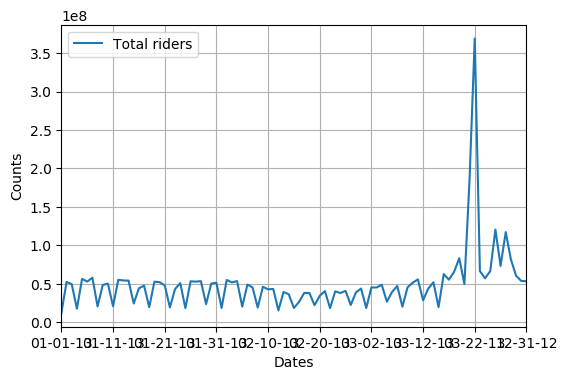

In [67]:
plt.rcParams['figure.dpi'] = 100

Q_1 = list(reversed(['turnstile_130330.csv', 'turnstile_130323.csv' , 'turnstile_130316.csv' 
                     ,'turnstile_130309.csv' , 'turnstile_130302.csv', 'turnstile_130223.csv' 
                     , 'turnstile_130216.csv' , 'turnstile_130209.csv' , 'turnstile_130202.csv' 
                     , 'turnstile_130126.csv' , 'turnstile_130119.csv' , 'turnstile_130112.csv', 'turnstile_130105.csv']))

def plot_1():
    data = pd.concat([pd.read_csv(LOCATION + Q_1[i] ) for i in range(len(Q_1))], ignore_index=True)
    data = data.drop(columns='Unnamed: 0')
    data = total_entries(data)
    
    suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()

    plt.figure(1)
    suma_ent.plot(label='Total riders')
    plt.xlabel('Dates')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid()

plot_1()

### Plot the daily total number of entries & exits across the system for Q1 2013.

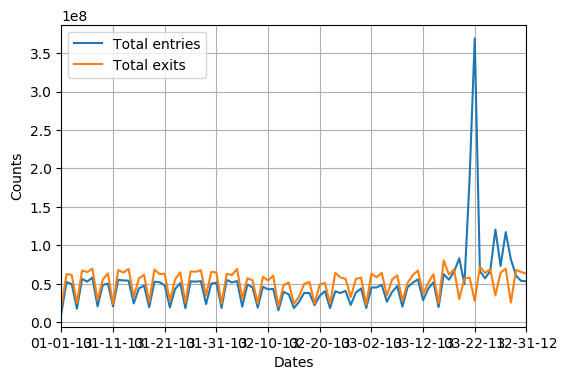

In [71]:
Q_1 = list(reversed(['turnstile_130330.csv', 'turnstile_130323.csv' , 'turnstile_130316.csv' 
                     ,'turnstile_130309.csv' , 'turnstile_130302.csv', 'turnstile_130223.csv' 
                     , 'turnstile_130216.csv' , 'turnstile_130209.csv' , 'turnstile_130202.csv' 
                     , 'turnstile_130126.csv' , 'turnstile_130119.csv' , 'turnstile_130112.csv', 'turnstile_130105.csv']))

def plot_2():
    data = pd.concat([pd.read_csv(LOCATION + Q_1[i]) for i in range(len(Q_1))], ignore_index=True)
    data = data.drop(columns='Unnamed: 0')
    data = total_entries(data)
    data = total_exits(data)
    
    suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
    suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()

    plt.figure(1)
    suma_ent.plot(label='Total entries')
    suma_ex.plot(label='Total exits')
    plt.xlabel('Dates')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid()

plot_2()

### Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q1 2013 for station 34 ST-PENN STA.

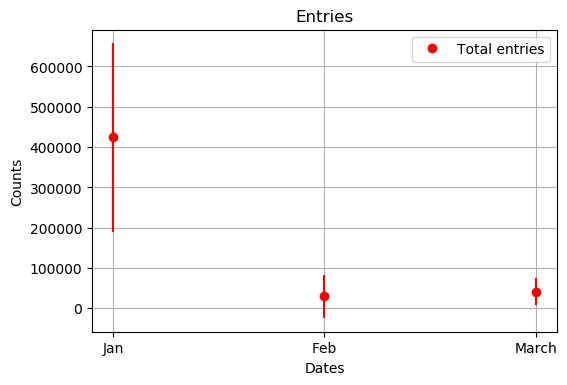

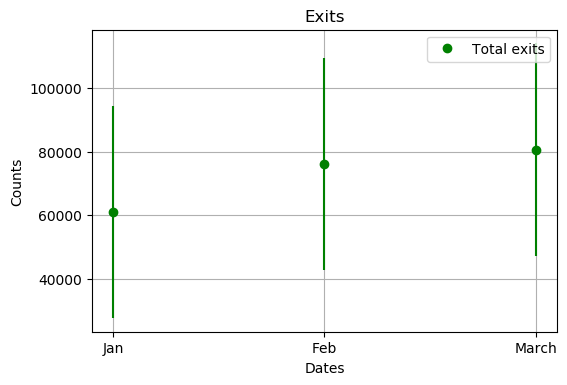

In [70]:
Q_1_3 = list(reversed(['turnstile_130330.csv', 'turnstile_130323.csv' , 'turnstile_130316.csv' 
                     ,'turnstile_130309.csv' , 'turnstile_130302.csv']))
Q_1_2 = list(reversed(['turnstile_130223.csv' 
                     , 'turnstile_130216.csv' , 'turnstile_130209.csv' , 'turnstile_130202.csv']))
Q_1_1 = list(reversed(['turnstile_130126.csv' , 'turnstile_130119.csv' , 'turnstile_130112.csv', 'turnstile_130105.csv',]))


plt.rcParams['figure.dpi'] = 100

def plot_3():
    lst = [Q_1_1, Q_1_2, Q_1_3]
    lst_str = ['Jan', 'Feb', 'March']
    plt.figure(1)
    for j in range(len(lst)):
        data = pd.concat([pd.read_csv(LOCATION + lst[j][i], parse_dates=['DATE%s' % k for k in range(1, 9)], infer_datetime_format=True) for i in range(len(Q_1_1))], ignore_index=True)
        data = data.drop(columns='Unnamed: 0')
        data = data[data['Station'] == '34 ST-PENN STA']
        data = total_entries(data)
    
        suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
    
        suma_ent = filter_(suma_ent)
        
        plt.plot(j, np.mean(suma_ent.values), 'ro')
        plt.errorbar(j,  np.mean(suma_ent.values), yerr=np.std(suma_ent.values), ecolor='r')
    plt.xticks(range(len(lst)), lst_str)
    plt.xlabel('Dates')
    plt.ylabel('Counts')
    plt.legend(['Total entries'])
    plt.grid()
    plt.title('Entries')
    
    plt.figure(2)
    for j in range(len(lst)):
        data = pd.concat([pd.read_csv(LOCATION + lst[j][i], parse_dates=['DATE%s' % k for k in range(1, 9)], infer_datetime_format=True) for i in range(len(Q_1_1))], ignore_index=True)
        data = data.drop(columns='Unnamed: 0')
        data = data[data['Station'] == '34 ST-PENN STA']
        data = total_exits(data)
    
        suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()
    
        suma_ex = filter_(suma_ex)
        
        plt.plot(j, np.mean(suma_ex.values), 'go')
        plt.errorbar(j,  np.mean(suma_ex.values), yerr=np.std(suma_ent.values), ecolor='g')
    plt.xticks(range(len(lst)), lst_str)
    plt.xlabel('Dates')
    plt.ylabel('Counts')
    plt.legend(['Total exits'])
    plt.grid()
    plt.title('Exits')

plot_3()

### Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q1 2013 for station 34 ST-PENN STA.

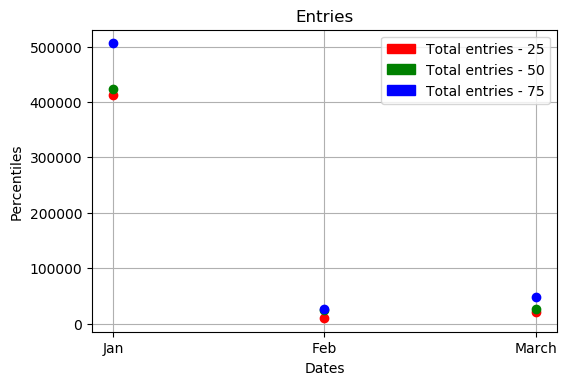

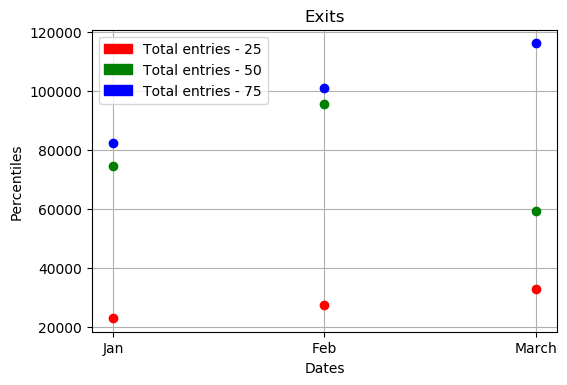

In [73]:
import matplotlib.patches as mpatches

Q_1_3 = list(reversed(['turnstile_130330.csv', 'turnstile_130323.csv' , 'turnstile_130316.csv' 
                     ,'turnstile_130309.csv' , 'turnstile_130302.csv']))
Q_1_2 = list(reversed(['turnstile_130223.csv' 
                     , 'turnstile_130216.csv' , 'turnstile_130209.csv' , 'turnstile_130202.csv']))
Q_1_1 = list(reversed(['turnstile_130126.csv' , 'turnstile_130119.csv' , 'turnstile_130112.csv', 'turnstile_130105.csv',]))


percents = [25, 50, 75]

def plot_4():
    lst = [Q_1_1, Q_1_2, Q_1_3]
    lst_str = ['Jan', 'Feb', 'March']
    plt.figure(1)
    for j in range(len(lst)):
        data = pd.concat([pd.read_csv(LOCATION + lst[j][i], parse_dates=['DATE%s' % k for k in range(1, 9)], infer_datetime_format=True) for i in range(len(Q_1_1))], ignore_index=True)
        data = data.drop(columns='Unnamed: 0')
        data = data[data['Station'] == '34 ST-PENN STA']
        data = total_entries(data)
        data = total_exits(data)
    
        suma_ent = data.groupby(['DATE1']).ENTRIES1.sum()  + data.groupby(['DATE1']).ENTRIES2.sum() + data.groupby(['DATE1']).ENTRIES3.sum() + data.groupby(['DATE1']).ENTRIES4.sum() + data.groupby(['DATE1']).ENTRIES5.sum() + data.groupby(['DATE1']).ENTRIES6.sum() + data.groupby(['DATE1']).ENTRIES7.sum() + data.groupby(['DATE1']).ENTRIES8.sum()
    
        suma_ent = filter_(suma_ent)
        
        plt.plot(j, np.percentile(suma_ent.values, 25), 'ro')
        plt.plot(j, np.percentile(suma_ent.values, 50), 'go')
        plt.plot(j, np.percentile(suma_ent.values, 75), 'bo')
    plt.xticks(range(len(lst)), lst_str)
    plt.xlabel('Dates')
    plt.ylabel('Percentiles')
    red_patch = mpatches.Patch(color='red', label='Total entries - 25')
    green_patch = mpatches.Patch(color='green', label='Total entries - 50')
    blue_patch = mpatches.Patch(color='blue', label='Total entries - 75')
    plt.legend(handles=[red_patch, green_patch, blue_patch])
    plt.title('Entries')
    plt.grid()
    
    plt.figure(2)
    for j in range(len(lst)):
        data = pd.concat([pd.read_csv(LOCATION + lst[j][i], parse_dates=['DATE%s' % k for k in range(1, 9)], infer_datetime_format=True) for i in range(len(Q_1_1))], ignore_index=True)
        data = data.drop(columns='Unnamed: 0')
        data = data[data['Station'] == '34 ST-PENN STA']
        data = total_entries(data)
        data = total_exits(data)
    
        suma_ex = data.groupby(['DATE1']).EXITS1.sum()  + data.groupby(['DATE1']).EXITS2.sum() + data.groupby(['DATE1']).EXITS3.sum() + data.groupby(['DATE1']).EXITS4.sum() + data.groupby(['DATE1']).EXITS5.sum() + data.groupby(['DATE1']).EXITS6.sum() + data.groupby(['DATE1']).EXITS7.sum() + data.groupby(['DATE1']).EXITS8.sum()
    
        suma_ex = filter_(suma_ex)

        plt.plot(j, np.percentile(suma_ex.values, 25), 'ro')
        plt.plot(j, np.percentile(suma_ex.values, 50), 'go')
        plt.plot(j, np.percentile(suma_ex.values, 75), 'bo')
    plt.xticks(range(len(lst)), lst_str)
    plt.xlabel('Dates')
    plt.ylabel('Percentiles')
    red_patch = mpatches.Patch(color='red', label='Total entries - 25')
    green_patch = mpatches.Patch(color='green', label='Total entries - 50')
    blue_patch = mpatches.Patch(color='blue', label='Total entries - 75')
    plt.legend(handles=[red_patch, green_patch, blue_patch])
    plt.title('Exits')
    plt.grid()
    
plot_4()